# Multi-Class Learning with handwritten digits

The dataset for this can be found in the folder <b>dataset2</b>. The training data will be in the file train.csv. Each image is a 28x28 pixel image therefore when unraveled there will be a total of 784 pixels indexed from 0 to 783. train.csv has 42000 training samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os as os
from scipy import optimize
from scipy.special import expit

In [2]:
input_layer_size = 784
num_labels = 10
data = pd.read_csv('dataset2/train.csv')
print(data.shape)
data_temp = data.head(5000)
data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


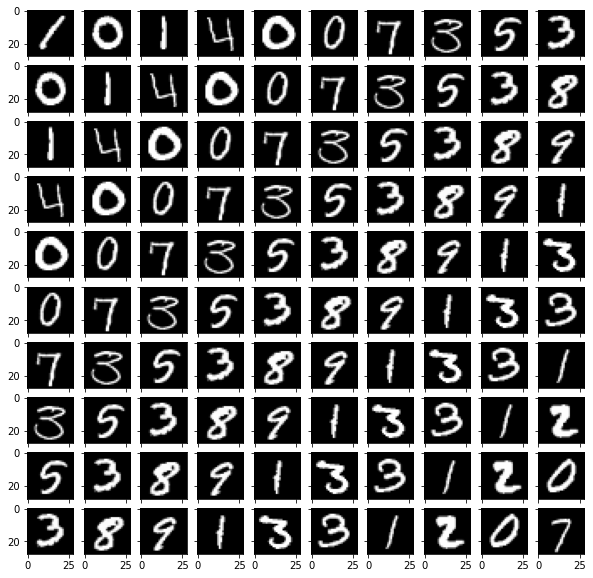

In [3]:
img1 = data.iloc[:100,1:].values
fig, ax = plt.subplots(nrows=10,ncols=10,sharey = True, sharex = True)
fig.set_figwidth(10)
fig.set_figheight(10)
for i in range(10):
  for j in range(10):
    img = img1[i+j].reshape(28,28)
    ax[i,j].imshow(img, cmap='gray')

In [15]:
def sigmoid(z):
    g = 1/(1+expit(-z))
    return g

x = data_temp.iloc[:,1:].values
ones = np.array(np.array([1 for i in range(len(x))]))
y = np.matrix(data_temp.iloc[:,0].values)
x = np.matrix(np.column_stack((ones,x)))
m,n = x.shape
theta = np.zeros((num_labels, n))
theta.shape
k = np.matrix([[1,2,3],[0,0,1]])

In [74]:
def gradDesc(theta,xA,yA,lambda_):
    m,n = xA.shape
    xA = np.matrix(xA)
    yA = np.matrix(yA)
    h = sigmoid(np.matrix(theta)*np.transpose(xA))
    J = (1/(2*m))*(-1*yA*np.log(h) - (1 - y)*np.log(1-h))
    Jreg = (lambda_/(2*m)) * np.sum(np.square(np.matrix(theta[1:,:])))
    J = J + Jreg
    grad = (1/m)*(h-np.transpose(yA)) 
    grad = np.transpose(grad)*x
    grad = np.array(grad)
    reg = (lambda_/m)*theta[1:,:]
    grad[1:,:] = grad[1:,:] + reg

    return J,grad

In [77]:
def oneVall(x,y,num_labels,lambda_):
    m,n = x.shape
    theta = np.ones((num_labels, n))
    JList = []
    xA = np.array(x)
    yA = np.array(y)
    theta = np.array(theta)
    theta_i = np.zeros(n)
    for label in range(num_labels):
        options= {'maxiter': 400}
        theta_optimized = optimize.minimize(gradDesc,
                        theta_i,
                        (xA, yA, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)
    theta = theta_optimized.x.reshape(n, 1)
    """"for i in range(iterations):
        jtemp,gtemp = gradDesc(theta,x,y,m,lambda_)
        theta = theta - alpha*gtemp
        JList.append(jtemp)
    return theta,JList"""

In [78]:
oneVall(x,y,num_labels,0.5)

ValueError: shapes (1,7850) and (785,5000) not aligned: 7850 (dim 1) != 785 (dim 0)

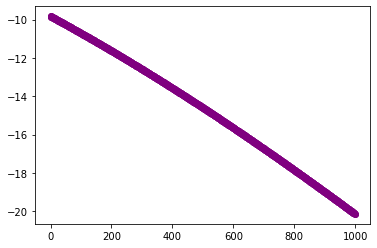

[[0.72749261 0.72749261 0.72749261 0.72749261 0.72749261 0.72749261
  0.72749261 0.72749261 0.72749261 0.72749261]]
4


In [39]:
def predict(x,theta):
    temp = sigmoid(x*np.transpose(theta))
    return temp
a = data.iloc[0:1,1:].values
one = np.array([1])
a = np.matrix(np.append(one, a))
itr = [i for i in range(1000)]
plt.scatter(itr,cost, marker='o', color='purple')
plt.show()
print(predict(a,all_theta))
print(np.matrix(data).item(3,0))

In [43]:
m,n = x.shape
theta = np.ones((num_labels, n))
h = sigmoid(x*np.transpose(np.matrix(theta)))
theta.shape

(10, 785)